# Reduction in CO2 emissions due to the fuel tax reform

# Import general modules

In [16]:
from __future__ import division

import pandas
import seaborn

# Import modules specific to OpenFisca

In [17]:
from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_bar
from openfisca_france_indirect_taxation.surveys import SurveyScenario
from openfisca_france_indirect_taxation.almost_ideal_demand_system.aids_estimation_from_stata import get_elasticities
from openfisca_france_indirect_taxation.examples.calage_bdf_cn_energy import get_inflators_by_year_energy

# Import new colors

In [18]:
seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline

# Simulate reduction in CO2 emission do to fuel tax reform by categories

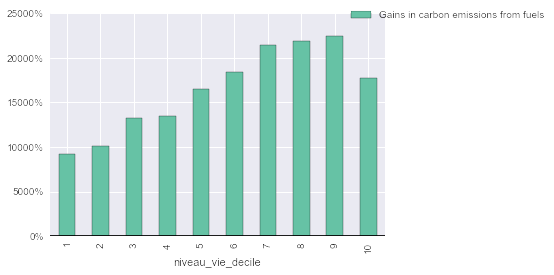

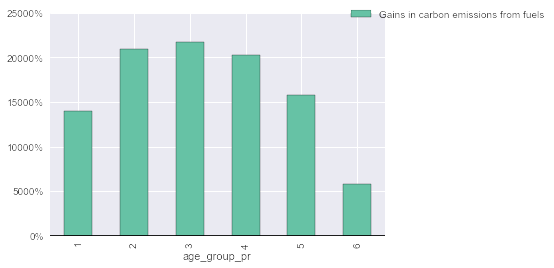

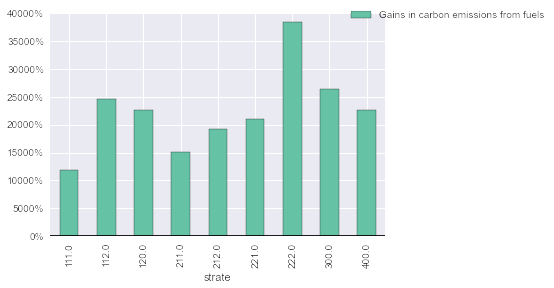

In [19]:
# Sélection des variables utilisées pour la simulation

inflators_by_year = get_inflators_by_year_energy(rebuild = False)
year = 2014
data_year = 2011
elasticities = get_elasticities(data_year)
inflation_kwargs = dict(inflator_by_variable = inflators_by_year[year])
del inflation_kwargs['inflator_by_variable']['somme_coicop12']

simulated_variables = ['difference_emissions_CO2_carburants_taxes_carburants']

survey_scenario = SurveyScenario.create(
    elasticities = elasticities,
    inflation_kwargs = inflation_kwargs,
    reform_key = 'taxes_carburants',
    year = year,
    data_year = data_year
    )

for category in ['niveau_vie_decile', 'age_group_pr', 'strate']:
    pivot_table = pandas.DataFrame()
    for values in simulated_variables:
        pivot_table = pandas.concat([
            pivot_table,
            survey_scenario.compute_pivot_table(values = [values], columns = ['{}'.format(category)])
            ])
    df = pivot_table.T
    df.rename(columns = {'difference_emissions_CO2_carburants_taxes_carburants': 'Gains in carbon emissions from fuels'},
        inplace = True)

    # Réalisation de graphiques
    graph_builder_bar(df)

# Simulate reduction in CO2 emission do to carbon tax reform by categories

In [20]:
# Sélection des variables utilisées pour la simulation

inflators_by_year = get_inflators_by_year_energy(rebuild = False)
year = 2014
data_year = 2011
elasticities = get_elasticities(data_year)
inflation_kwargs = dict(inflator_by_variable = inflators_by_year[year])
del inflation_kwargs['inflator_by_variable']['somme_coicop12']

simulated_variables = ['difference_emissions_CO2_energies_taxe_carbone']

survey_scenario = SurveyScenario.create(
    elasticities = elasticities,
    inflation_kwargs = inflation_kwargs,
    reform_key = 'taxe_carbone',
    year = year,
    data_year = data_year
    )

pivot_table = pandas.DataFrame()
for values in simulated_variables:
    pivot_table = pandas.concat([
        pivot_table,
        survey_scenario.compute_pivot_table(values = [values], columns = ['niveau_vie_decile'])
        ])
df = pivot_table.T
df.rename(columns = {'difference_emissions_CO2_energies_taxe_carbone': 'Reduction in carbon emissions from all energies'},
    inplace = True)

# Réalisation de graphiques
graph_builder_bar(df)

KeyError: 'difference_emissions_CO2_energies_taxe_carbone'